# Bella Lui - EPFL - 2020

Bella Lui Kaltbrunn Mission from ERT (EPFL Rocket Team)
Permission to use flight data given by Antoine Scardigli, 2020


In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

In [48]:
plt.style.use("seaborn-v0_8-dark-palette")

OSError: 'seaborn-v0_8-dark-palette' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

## RocketPy Simulation


Define a dictionary with the inputs for the simulation


In [67]:
parameters = {
    # Mass Details
    "rocket_mass": (18.227 - 0.001, 0.010),  # propellant mass = 1.373
    # propulsion details
    "impulse": (2157, 0.03 * 2157),
    "burn_time": (2.43, 0.1),
    "nozzle_radius": (44.45 / 1000, 0.001),
    "throat_radius": (21.4376 / 1000, 0.001),
    "grain_separation": (3 / 1000, 1 / 1000),
    "grain_density": (782.4, 30),
    "grain_outer_radius": (85.598 / 2000, 0.001),
    "grain_initial_inner_radius": (33.147 / 1000, 0.002),
    "grain_initial_height": (152.4 / 1000, 0.001),
    # Aerodynamic Details
    "inertia_i": (0.78267, 0.03 * 0.78267),
    "inertia_z": (0.064244, 0.03 * 0.064244),
    "radius": (156 / 2000, 0.001),
    "distance_rocket_nozzle": (-1.1356, 0.100),
    "distance_rocket_propellant": (-1, 0.100),
    "power_off_drag": (1, 0.05),
    "power_on_drag": (1, 0.05),
    "nose_length": (0.242, 0.001),
    "nose_distance_to_cm": (1.3, 0.100),
    "fin_span": (0.200, 0.001),
    "fin_root_chord": (0.280, 0.001),
    "fin_tip_chord": (0.125, 0.001),
    "fin_distance_to_cm": (-0.75, 0.100),
    "tail_top_radius": (156 / 2000, 0.001),
    "tail_bottom_radius": (135 / 2000, 0.001),
    "tail_length": (0.050, 0.001),
    "tail_distance_to_cm": (-1.0856, 0.001),
    # Launch and Environment Details
    "wind_direction": (0, 5),
    "wind_speed": (1, 0.05),
    "inclination": (89, 1),
    "heading": (45, 5),
    "rail_length": (4.2, 0.001),
    # Parachute Details
    "CdS_drogue": (np.pi / 4, 0.20 * np.pi / 4),
    "lag_rec": (1, 0.020),
}

### Environment


Define the `Environment` object


In [68]:
# Environment conditions
env = Environment(
    gravity=9.81,
    latitude=47.213476,
    longitude=9.003336,
    date=(2020, 2, 22, 13),
    elevation=407,
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/bella_lui_weather_data_ERA5.nc",
    dictionary="ECMWF",
)

env.max_expected_height = 1000

Visualize the `Environment` object



Gravity Details

Acceleration of gravity at surface level:    9.8100 m/s²
Acceleration of gravity at   1.000 km (ASL): 9.8100 m/s²


Launch Site Details

Launch Date: 2020-02-22 13:00:00 UTC
Launch Site Latitude: 47.21348°
Launch Site Longitude: 9.00334°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 500252.61 E    5228887.37 N
Launch Site UTM zone: 32T
Launch Site Surface Elevation: 407.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 1.000 km
Reanalysis Time Period: from 2020-02-22 00:00:00 to 2020-02-22 18:00:00 utc
Reanalysis Hour Interval: 4 hrs
Reanalysis Latitude Range: From 48.0° to 46.0°
Reanalysis Longitude Range: From 8.0° to 10.0°

Surface Atmospheric Conditions

Surface Wind Speed: 1.26 m/s
Surface Wind Direction: 213.21°
Surface Wind Heading: 33.21°
Surface Pressure: 980.43 hPa
Surface Temperature: 286.63 K
Surface Air Density: 1.192 kg/m³
Surface Speed of Sound: 339.39 m/s


Earth Model Details

Earth Radius at Lau

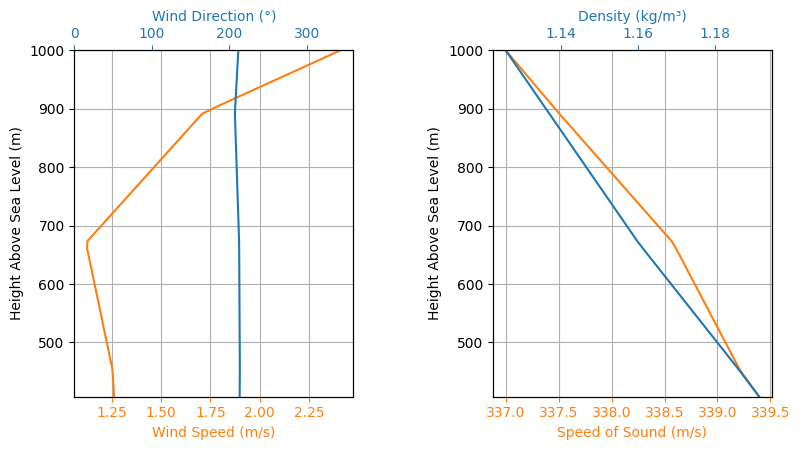

In [69]:
env.info()

### Motor


Define the `SolidMotor` object


In [70]:
k828fj = SolidMotor(
    thrust_source="../../data/motors/aerotech/AeroTech_K828FJ.eng",
    burn_time=parameters.get("burn_time")[0],
    dry_mass=0.001,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=0.3,
    grains_center_of_mass_position=0.3,
    grain_number=3,
    grain_separation=parameters.get("grain_separation")[0],
    grain_density=parameters.get("grain_density")[0],
    grain_outer_radius=parameters.get("grain_outer_radius")[0],
    grain_initial_inner_radius=parameters.get("grain_initial_inner_radius")[0],
    grain_initial_height=parameters.get("grain_initial_height")[0],
    nozzle_radius=parameters.get("nozzle_radius")[0],
    throat_radius=parameters.get("throat_radius")[0],
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

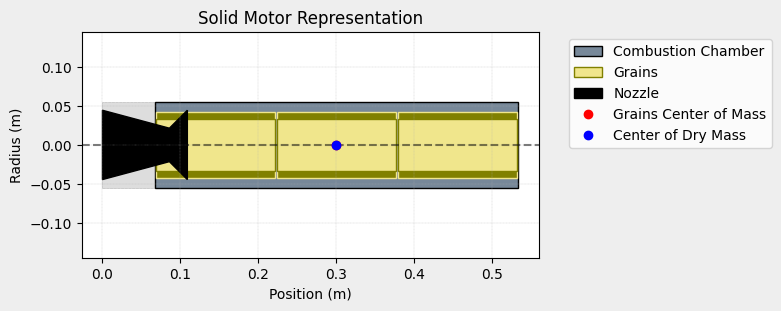

In [71]:
k828fj.plots.draw()

Nozzle Details
Nozzle Radius: 0.04445 m
Nozzle Throat Radius: 0.0214376 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.003 m
Grain Density: 782.4 kg/m3
Grain Outer Radius: 0.042799 m
Grain Inner Radius: 0.033146999999999996 m
Grain Height: 0.1524 m
Grain Volume: 0.000 m3
Grain Mass: 0.275 kg

Motor Details
Total Burning Time: 2.43 s
Total Propellant Mass: 0.824 kg
Structural Mass Ratio: 0.001
Average Propellant Exhaust Velocity: 2514.035 m/s
Average Thrust: 852.260 N
Maximum Thrust: 1303.79 N at 0.04 s after ignition.
Total Impulse: 2070.992 Ns



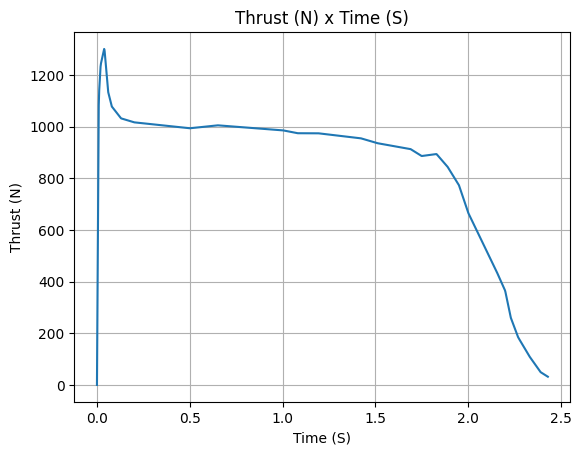

In [72]:
k828fj.info()

### Rocket


Create the `Rocket` object


In [73]:
bella_lui = Rocket(
    radius=parameters.get("radius")[0],
    mass=parameters.get("rocket_mass")[0],
    inertia=(
        parameters.get("inertia_i")[0],
        parameters.get("inertia_i")[0],
        parameters.get("inertia_z")[0],
    ),
    power_off_drag=0.43,
    power_on_drag=0.43,
    center_of_mass_without_motor=0,
)
bella_lui.set_rail_buttons(0.1, -0.5)
bella_lui.add_motor(motor=k828fj, position=parameters.get("distance_rocket_nozzle")[0])

Adding aerodynamic surfaces


In [74]:
nose_cone = bella_lui.add_nose(
    length=parameters.get("nose_length")[0],
    kind="tangent",
    position=parameters.get("nose_distance_to_cm")[0]
    + parameters.get("nose_length")[0],
)
fin_set = bella_lui.add_trapezoidal_fins(
    3,
    span=parameters.get("fin_span")[0],
    root_chord=parameters.get("fin_root_chord")[0],
    tip_chord=parameters.get("fin_tip_chord")[0],
    position=parameters.get("fin_distance_to_cm")[0],
)
tail = bella_lui.add_tail(
    top_radius=parameters.get("tail_top_radius")[0],
    bottom_radius=parameters.get("tail_bottom_radius")[0],
    length=parameters.get("tail_length")[0],
    position=parameters.get("tail_distance_to_cm")[0],
)

Adding Parachute


In [75]:
Drogue = bella_lui.add_parachute(
    "Drogue",
    cd_s=parameters.get("CdS_drogue")[0],
    trigger="apogee",
    sampling_rate=105,
    lag=parameters.get("lag_rec")[0],
    noise=(0, 8.3, 0.5),
)

Modify the Drag Coefficient curve


In [76]:
# Define aerodynamic drag coefficients
bella_lui.power_off_drag = Function(
    [
        (0.01, 0.51),
        (0.02, 0.46),
        (0.04, 0.43),
        (0.28, 0.43),
        (0.29, 0.44),
        (0.45, 0.44),
        (0.49, 0.46),
    ],
    "Mach Number",
    "Drag Coefficient with Power Off",
    "linear",
    "constant",
)
bella_lui.power_on_drag = Function(
    [
        (0.01, 0.51),
        (0.02, 0.46),
        (0.04, 0.43),
        (0.28, 0.43),
        (0.29, 0.44),
        (0.45, 0.44),
        (0.49, 0.46),
    ],
    "Mach Number",
    "Drag Coefficient with Power On",
    "linear",
    "constant",
)
bella_lui.power_off_drag *= parameters.get("power_off_drag")[0]
bella_lui.power_on_drag *= parameters.get("power_on_drag")[0]

In [77]:
bella_lui.info()


Inertia Details

Rocket Mass: 18.226 kg (without motor)
Rocket Dry Mass: 18.227 kg (with unloaded motor)
Rocket Loaded Mass: 19.051 kg
Rocket Structural Mass Ratio: 0.957
Rocket Inertia (with unloaded motor) 11: 0.783 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.783 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.064 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.078 m
Rocket Frontal Area: 0.019113 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.136 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.836 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.036 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 10.281/rad
Tail Lift Coefficient De

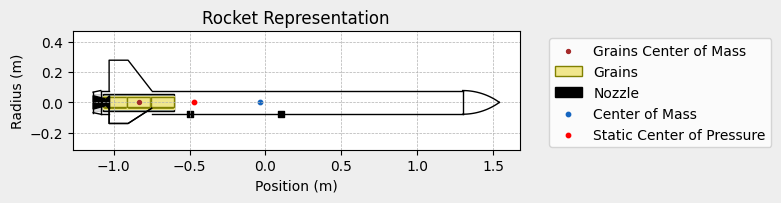

In [78]:
bella_lui.draw()

### Flight


In [79]:
# Flight
test_flight = Flight(
    rocket=bella_lui,
    environment=env,
    rail_length=parameters.get("rail_length")[0],
    inclination=parameters.get("inclination")[0],
    heading=parameters.get("heading")[0],
    equations_of_motion="solid_propulsion",
    simulation_mode="3 DOF"
)

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 407.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 1.000 | e1: -0.006 | e2: 0.006 | e3: 0.000
Euler Angles - Spin φ : 45.00° | Nutation θ: -1.00° | Precession ψ: -45.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.777 c


Surface Wind Conditions

Frontal Surface Wind Speed: 1.23 m/s
Lateral Surface Wind Speed: 0.26 m/s


Launch Rail

Launch Rail Length: 4.2 m
Launch Rail Inclination: 89.00°
Launch Rail Heading: 45.00°


Rail Departure State

Rail Departure Time: 0.359 s
Rail Departure Velocity: 16.184 m/s
Rail Departure Stability Margin: 2.818 c
Rail Departure Angle of Attack: 4.457°
Rail Departure Thrust-Weight Ratio: 5.416
Rail Departure Reynolds Number: 1.691e+05


Burn out State

Burn out time: 2.430 s
Altitude at burn out: 530.013 m (ASL) | 123.013 m (AGL)
Rocket speed at burn out: 85.175 m/s
Freestream veloci

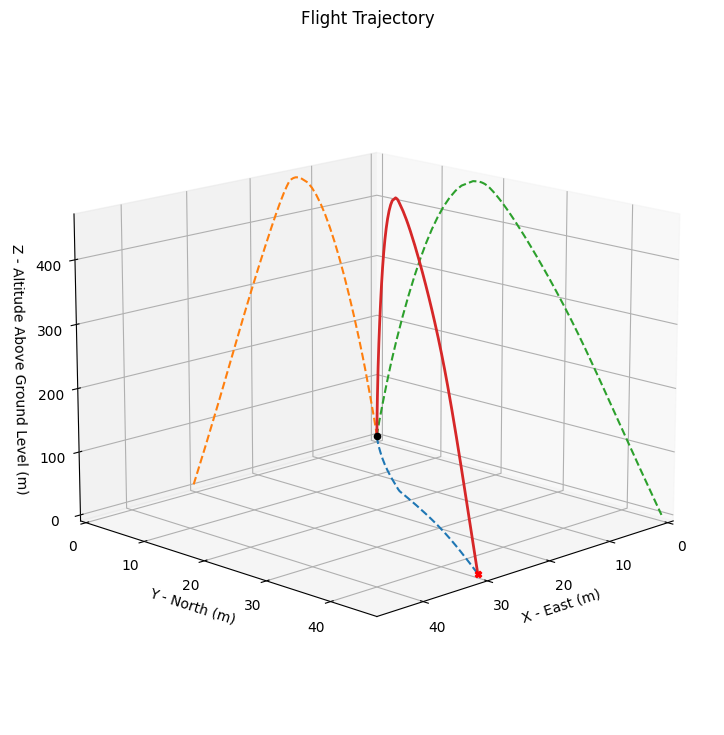

In [80]:
test_flight.info()
test_flight.plots.trajectory_3d()

## Comparison with the real flight data


Load the available flight data: altitude above ground level (m), vertical velocity (m/s), time (s)


In [54]:
flight_data = np.loadtxt(
    "../../data/rockets/EPFL_Bella_Lui/bella_lui_flight_data_filtered.csv",
    skiprows=1,
    delimiter=",",
    usecols=(2, 3, 4),
)

Convert to Function objects


In [55]:
actual_z = Function(
    source=np.column_stack((flight_data[:573, 0], flight_data[:573, 1])),
    inputs="Time (s)",
    outputs="Altitude above ground level (m)",
    interpolation="linear",
    extrapolation="zero",
)

actual_vz = Function(
    source=np.column_stack((flight_data[:573, 0], flight_data[:573, 2])),
    inputs="Time (s)",
    outputs="Vertical velocity (m/s)",
    interpolation="linear",
    extrapolation="zero",
)

# the actual acceleration will be calculated as the derivative of the actual velocity
actual_az = actual_vz.derivative_function()

We may need to filter the acceleration data to reduce the noise


In [56]:
az_filtered = savgol_filter(x=actual_az.source[:, 1], window_length=51, polyorder=3)

actual_az_filtered = Function(
    source=np.column_stack((actual_az.source[:, 0], az_filtered)),
    inputs="Time (s)",
    outputs="Vertical acceleration (m/s^2)",
    interpolation="linear",
    extrapolation="zero",
)

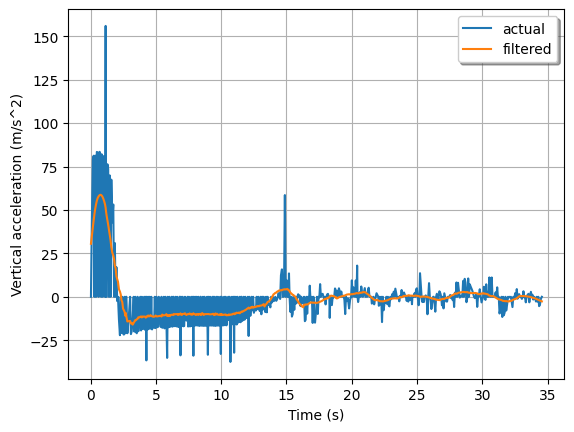

In [57]:
Function.compare_plots(
    [(actual_az, "actual"), (actual_az_filtered, "filtered")],
    xlabel="Time (s)",
    ylabel="Vertical acceleration (m/s^2)",
)

Get the simulated results


In [58]:
simulated_z = test_flight.z - env.elevation
simulated_vz = test_flight.vz
simulated_az = test_flight.az
simulated_t_final = test_flight.t_final
simulated_apogee = test_flight.apogee - env.elevation

### Plots comparison


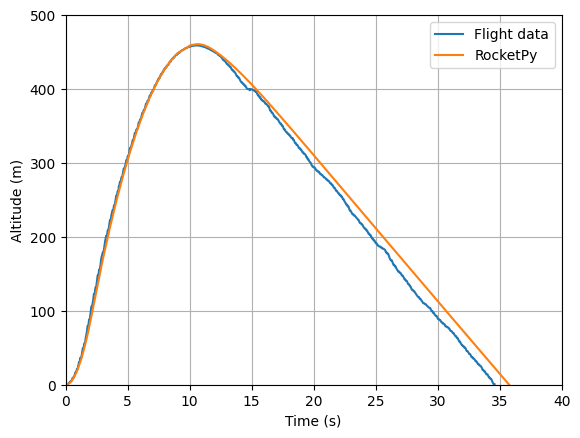

In [59]:
plt.plot(actual_z[:, 0], actual_z[:, 1], label="Flight data")
plt.plot(simulated_z[:, 0], simulated_z[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.ylim(0, round(simulated_apogee, -2))
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

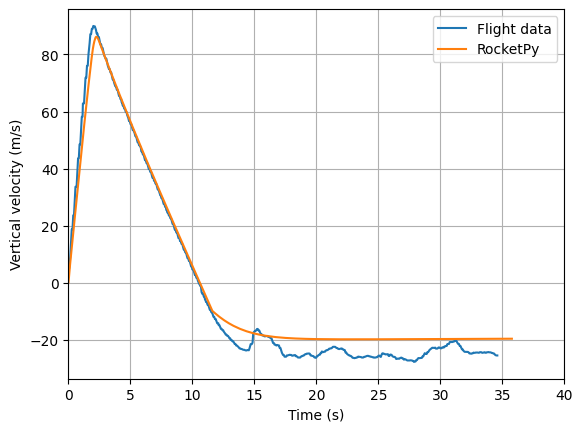

In [60]:
plt.plot(actual_vz[:, 0], actual_vz[:, 1], label="Flight data")
plt.plot(simulated_vz[:, 0], simulated_vz[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Vertical velocity (m/s)")
# plt.ylim()
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

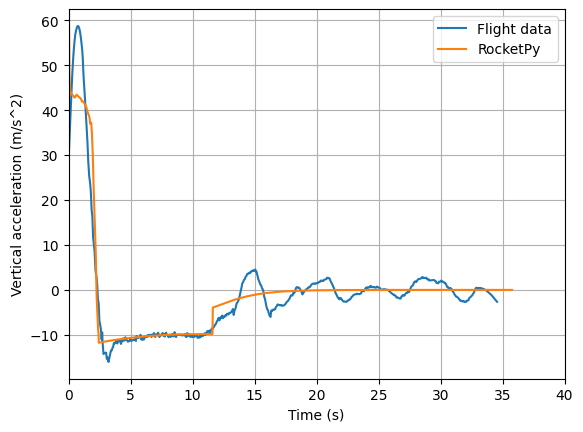

In [61]:
plt.plot(actual_az_filtered[:, 0], actual_az_filtered[:, 1], label="Flight data")
plt.plot(simulated_az[:, 0], simulated_az[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Vertical acceleration (m/s^2)")
# plt.ylim()
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

### Numerical comparison


In [62]:
print("Apogee (AGL)")
print(f"RocketPy: {simulated_apogee:.2f} m")
print(f"Real data: {actual_z.max:.2f} m")
diff = abs(actual_z.max - simulated_apogee)
print(f"Absolute error: {diff:.2f} m")
print(f"Relative error: {diff / actual_z.max * 100:.2f} %")

Apogee (AGL)
RocketPy: 460.74 m
Real data: 458.97 m
Absolute error: 1.77 m
Relative error: 0.39 %


In [63]:
print("Max Velocity")
print(f"RocketPy:  {simulated_vz.max:.2f} m/s")
print(f"Real data: {actual_vz.max:.2f} m/s")
velocity_error = simulated_vz.max - actual_vz.max
print(f"Absolute error: {velocity_error:.2f} m/s")
relative_error = abs(velocity_error) / actual_vz.max * 100
print(f"Relative error: {relative_error:.2f} %")

Max Velocity
RocketPy:  86.20 m/s
Real data: 90.00 m/s
Absolute error: -3.80 m/s
Relative error: 4.23 %


In [64]:
print("Max Acceleration")
print(f"RocketPy:  {simulated_az.max:.2f} m/s²")
print(f"Real data (derivative): {actual_az_filtered.max:.2f} m/s²")
acceleration_error = simulated_az.max - actual_az_filtered.max
print(f"Absolute error: {acceleration_error:.2f} m/s^2")
relative_error = abs(acceleration_error) / actual_az_filtered.max * 100
print(f"Relative error: {relative_error:.2f} %")

Max Acceleration
RocketPy:  58.46 m/s²
Real data (derivative): 58.73 m/s²
Absolute error: -0.27 m/s^2
Relative error: 0.46 %
